In [2]:
# August 25 2017
# This file is for experiments with student2 4 skills and training trajectory length 5
# to check different architectures and whether they can learn good models
# This uses student2a where transitions happen after observations

%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import scipy as sp
import six
from matplotlib.pyplot import *

def graph_trainauc_score(vloss, scores):
    figure()
    xs = np.sum(vloss,axis=1)
    ys = scores
    title('Training Loss AUC versus Actual Performance')
    xlabel('Training Loss AUC')
    ylabel('Posttest Score')
    plot(xs,ys,'.')
    ylim(0,1)

def graph_trainauc_qval(vloss, qval):
    figure()
    xs = np.sum(vloss,axis=1)
    ys = qval
    title('Training Loss AUC versus Own Qvalue')
    xlabel('Training Loss AUC')
    ylabel('Qvalue')
    plot(xs,ys,'.')

def graph_qval_score(qval, scores):
    figure()
    xs = qval
    ys = scores
    title('Own Qval versus Actual Performance')
    xlabel('Qvalue')
    ylabel('Posttest Score')
    plot(xs,ys,'.')

# Learning Rate 0.0005 Stability

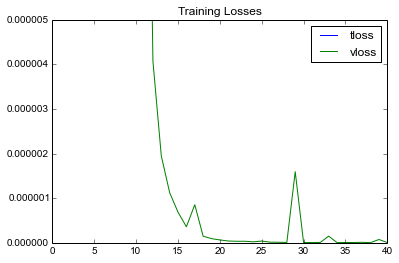

In [7]:
data11 = np.load('experiments/test2_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w4-n100000-l5-random.pickle/stats-runA.npz')

tloss = data11['tloss']
tloss_mean = np.mean(tloss,axis=0)
tloss_std = np.std(tloss,axis=0)/tloss.shape[0]

vloss = data11['vloss']
vloss_mean = np.mean(vloss,axis=0)
vloss_std = np.std(vloss,axis=0)/vloss.shape[0]

figure()
title('Training Losses')
plot(tloss_mean,label='tloss')
plot(vloss_mean,label='vloss')
ylim(0,0.000005)
legend()
# looks like after 20 is enough. Use 25.

# Learning Rate 0.0005 Noise 0.05 Stability

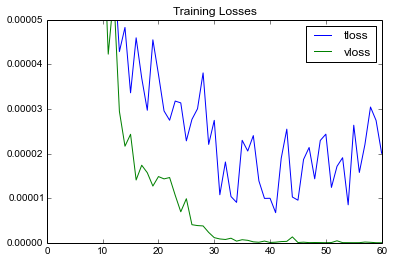

In [8]:
data11 = np.load('experiments/test2_modelgrusimple_mid-noise0.05-dropout10-shuffle1-data-test2a-w4-n100000-l5-random.pickle/stats-runA.npz')

tloss = data11['tloss']
tloss_mean = np.mean(tloss,axis=0)
tloss_std = np.std(tloss,axis=0)/tloss.shape[0]

vloss = data11['vloss']
vloss_mean = np.mean(vloss,axis=0)
vloss_std = np.std(vloss,axis=0)/vloss.shape[0]

figure()
title('Training Losses')
plot(tloss_mean,label='tloss')
plot(vloss_mean,label='vloss')
ylim(0,0.00005)
legend()
# looks like around 50

# Debug Memoize on Stability Runs

In [6]:
data11 = np.load('experiments/test2_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w4-n100000-l5-random.pickle/mem-runA0-epoch40.npz')
six.print_(data11.files)
mem_arrays = data11['mem_arrays']
six.print_(mem_arrays[0])
six.print_(mem_arrays[1])
six.print_(mem_arrays[5][1000])

['mem_arrays']
[[ 0.  0.  0.  0.]]
[[  9.99760926e-01   3.76824639e-03   8.07295844e-04   9.57022654e-04]
 [  9.99999642e-01   1.92387219e-04   1.35941254e-05   2.43485943e-06]
 [  9.99998569e-01   2.81491225e-06   1.97608519e-04   1.10886810e-06]
 [  9.99971271e-01   1.81344876e-05   1.97847603e-05   5.24370116e-05]
 [  9.99985337e-01   1.15873900e-05   2.18772057e-05   1.53569781e-05]
 [  9.99988198e-01   8.85017812e-02   7.98502413e-04   1.37441570e-03]
 [  9.99203026e-01   2.60969537e-04   4.24301326e-02   1.45776814e-03]
 [  9.99477923e-01   7.42685515e-04   2.93014711e-03   2.23981193e-03]]
[  9.99999881e-01   9.99945760e-01   6.82999162e-05   2.55893869e-03]
